<a href="https://colab.research.google.com/github/Vlasovasona/Python-and-ML-Raschka/blob/main/%D0%A1%D0%B6%D0%B0%D1%82%D0%B8%D0%B5_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%BF%D1%83%D1%82%D0%B5%D0%BC_%D1%83%D0%BC%D0%B5%D0%BD%D1%8C%D1%88%D0%B5%D0%BD%D0%B8%D1%8F_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Уменьшение размерности без учителя с помощью метода главных компонент


---



**Алгоритм РСА (метода гл. комп.) для понижения размерности:**


1.   Стандартизируем d-мерный набор данных.
2.   Строим ковариационную матрицу.
3.   Раскладываем ковариационную матрицу на собственные векторы и собственные значения.
4.   Сортируем собственные значения в порядке убывания, чтобы ранжировать соответствующие собственные векторы.
5.   Выбираем k собственных векторов, которые соответствуют k наибольшим собственным значениям, где k - размерность нового подпространства признаков (k <= d).
6.   Строим матрицу проекции ***W*** из верхних k собственных векторов.
7.   Преобразовываем d-мерный входной набор данных X, используя матрицу проекции W, чтобы получить новое k-мерное подпространство признаков.



In [ ]:
import pandas as pd
df_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/'
    'machine-learning-databases/wine/wine.data',
    header=None
)

In [ ]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=0)
# стандартизация признаков
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
import numpy as np
cov_mat = np.cov(X_train_std.T) # вычисление ковариационной матрицы стандартизированного набора обучающих данных
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) # получили вектор, содержащий 13 собственных значений
# и матрицу eigen_vecs соответствующих собственных векторов
print('\nEigenvalues\n', eigen_vals)


Eigenvalues
 [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


Поскольку мы стремимся уменьшить размерность нашего набора данных, сжав его в новое подпространство признаков, то выбираем только такое подмножество собственных векторов (главных компонент), которое содержит большую часть информации (дисперсию). Собственные значения определяют величину собственных векторов, поэтому мы должны отсортировать собственные значения по убыванию величины, - нас интересуют лучшие k собственных векторов на онове величины их соответствующих собственных значений.

Доля объясненной дисперсии собственного значения λj представляет собой просто частное собственного значения λj и полной суммы собственных значений:

**Доля объясненной дисперсии $ = \frac{λ_j}{Σλ_j} $**

Используя функцию cumsum библиотеки NumPy, мы можем вычислить накопительную сумму объясненных дисперсий, которую затем построим с помощью функции step из Matplotlib.

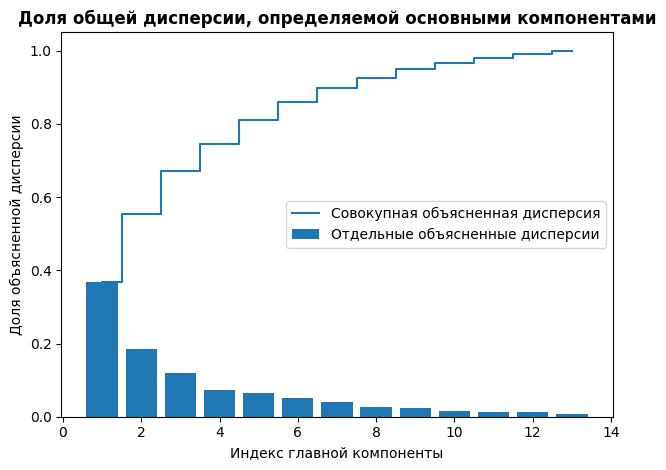

In [ ]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1, 14), var_exp, align='center',
        label='Отдельные объясненные дисперсии')
plt.step(range(1,14), cum_var_exp, where='mid',
         label='Совокупная объясненная дисперсия')
plt.ylabel('Доля объясненной дисперсии')
plt.xlabel('Индекс главной компоненты')
plt.legend(loc='best')
plt.title(label='Доля общей дисперсии, определяемой основными компонентами', fontweight='bold')
plt.tight_layout()
plt.show()

Полученный график показывает, что только на первую главную компоненту
приходится примерно 40 % дисперсии. Кроме того, мы видим, что первые две основные компоненты в совокупности объясняют почти 60 % дисперсии в наборе данных.

Хотя значения важности признаков можно вычислить при помощи случайных лесов, нельзя забывать, что РСА - это метод без учителя, а это означает, что информация о метках классов игнорируется. В то время как случайные лес использует информацию о сленстве в классе для вычисления примесей узлов, дисперсия просто измеряет разброс значений по оси признаков.

In [ ]:
# создаем список пар (eigenvalue, eigenvector)
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
# сортируем пары по убыванию
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [ ]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print("Матрица W:\n", w)

Матрица W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [ ]:
X_train_std[0]

array([ 0.71225893,  2.22048673, -0.13025864,  0.05962872, -0.50432733,
       -0.52831584, -1.24000033,  0.84118003, -1.05215112, -0.29218864,
       -0.20017028, -0.82164144, -0.62946362])

Используя матрицу проекции, преобразуем экземпляр x (представленный в виде 13-мерного вектора-строки) в подпространство РСА (первая и вторая главные компоненты), получив x' - теперь уже двумерный вектор, состоящий из двух новых признаков:

$$ x' = xW $$

In [ ]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

Аналогичным образом мы можем преобразовать весь обучающий набор данных размером 124 на 13 в две основные компоненты, вычислив скалярное произведение матриц:

$$ X' = XW $$

Наконец, визуализируем преобразованный обучающий набор данных Wine, который теперь хранитсяя в виде двумерной матрицы 124×2, построив диаграмму рассеяния:

In [ ]:
X_train_pca = X_train_std.dot(w)

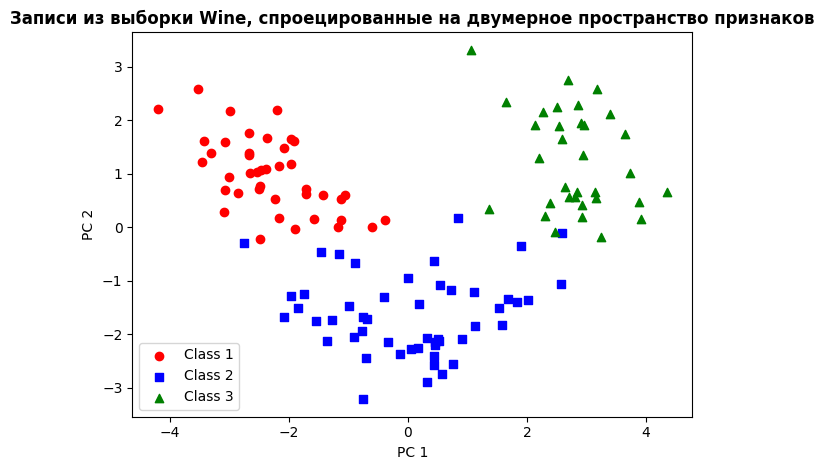

In [ ]:
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_pca[y_train==l, 0],
              X_train_pca[y_train==l, 1],
              c=c, label=f'Class {l}', marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.title(label='Записи из выборки Wine, спроецированные на двумерное пространство признаков', fontweight='bold')
plt.tight_layout()
plt.show()

Как можно видеть на рисунке, данные сильнее разбросаны по направлению первой главной компоненты (ось х), чем по направлению ординаты, что согласуется ч графиком доли объясненной дисперсии.

# Анализ основных компонент в scikit-learn


---



In [ ]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02, test_idx=None):
  # настройка генератора меток и цветовой карты
  markers = ['o', 's', '^', 'v', '<']
  colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # построение решающей поверхности
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution)) # создание матричных массивов
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # преобразование меток прогнозируемых классов в сетку с теми же размерами, что и xx1, xx2
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # построение образцов класса
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=f'Class {cl}',
                edgecolor='black')
  if test_idx:
    # отобразить все образцы
    X_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:, 0], X_test[:, 1],
                c='None', edgecolor='black',
                alpha=1.0, linewidth=1, marker='o',
                s=100, label='Test set')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


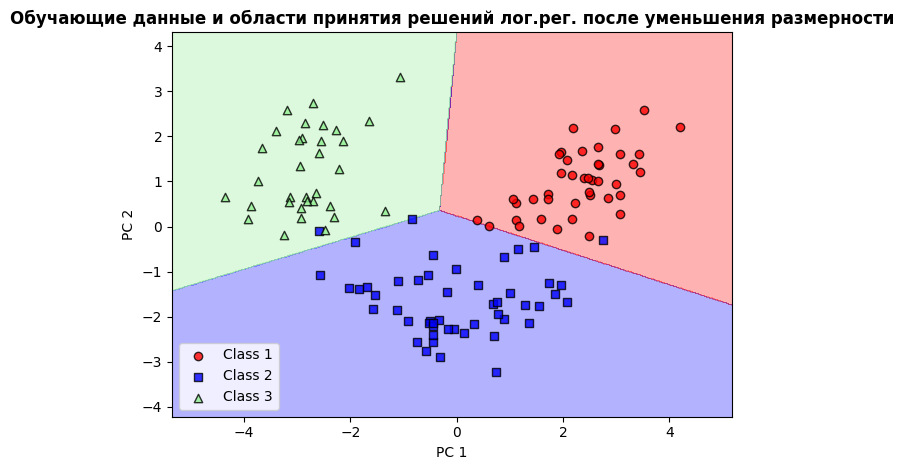

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
# инициализация преобразователя PCА
# и оценивателя логистической регрессии:
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr',
                        random_state=1,
                        solver='lbfgs')
# понижение размерности:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# обучение модели логистической регрессии на новом наборе:
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.title(label='Обучающие данные и области принятия решений лог.рег. после уменьшения размерности',
          fontweight='bold')
plt.tight_layout()
plt.show()

Если нас интересуют доли объясненной дисперсии различных компонент, мы можем просто инициализировать класс PCA с параметром n_components = None, чтобы все главные компоненты были сохранены, а затем получить доступ к доле объсненной дисперсии через атрибут explained_variance_ratio_

In [20]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

# Оценка вклада признаков


---



С помощью РСА мы создаем главные компоненты, которые представляют собой линейные комбинации признаков. Иногда былвает полезно узнать, какой вклад вносит каждый исходный признак в определенную главную компоненту. Этот вкалд часто называют *нагрузкой* признака на компоненту.

Факторные нагрузки могут быть вычислены путем умножения собственных векторов на квадратный коренб из собственных значений. Полученные значения затем можно интерпретировать как корреляцию между исходными признаками и главной компонентой.

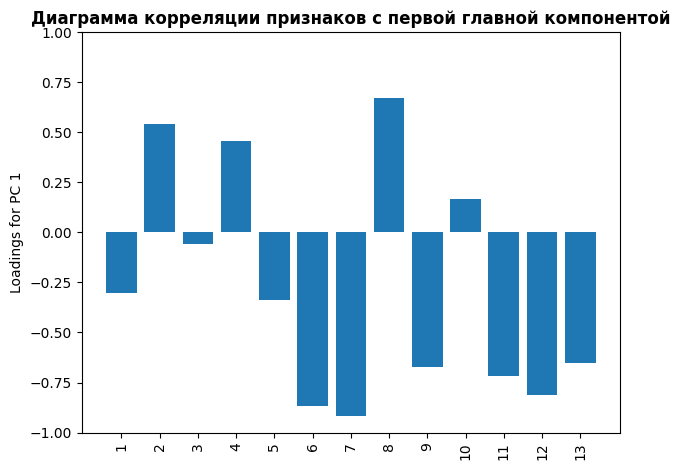

In [26]:
loadings = eigen_vecs * np.sqrt(eigen_vals) # матрица нагрузок, умножили собственные векторы на собственные числа

fig, ax = plt.subplots()
ax.bar(range(13), loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)
plt.ylim([-1, 1])
plt.title(label='Диаграмма корреляции признаков с первой главной компонентой', fontweight='bold')
plt.tight_layout()
plt.show()

# Сжаие данных с учителем с помощью линейного дискриминантного анализа (LDA)


---



Идея LDA похожа на PCA, но в то время как PCA ищет оси ортогональных компонент максимальной дисперсии в наборе данных, цель LDA состоит в том, чтобы найти подпространство признаков, которое оптимизирует разделимость классов.

Одно из предположений в LDA состоит в том, что данные распределены нормально. Также предполагается, что классы имеют идентичные ковариационные матрицы и что обучающие экземпляры статистически независимы друг от друга. Однако, даже если одно или несколько из этих предположений слегка нарушены LDA все еще может достаточно хорошо понижать размерность.


---




**Шаги алгоритма:**

1. Стандартизируем d-мерный набор данных (d-кол-во признаков).
2. Для каждого класса вычислите d-мерный средний вектор.
3. Постройте матрицу межклассового разброса Sb и матрицу внутриклассового разброса $$ S_w^{-1}S_b $$
4. Вычислите собственные векторы и соответствующие собственные значения матрицы.
5. Отсортируйте собственные значения в порядке обывания, чтобы ранжировать соответствующие собственные векторы.
6. Выберите k собственных векторов, соответствующих k наибольшим собственным значениям, чтобы построить d×k-мерную матрицу преобразования ***W***, где собственные векторы являются столбцами этой матрицы.
7. Спроецируйте экземпляры набора данных на подпространство новых признаков, используя матрицу преобразования ***W***.

# Вычисление метриц разброса


---

**Средний вектор матрицы** — это вектор, каждый элемент которого равен среднему арифметическому значений соответствующего столбца или строки матрицы.

Каждый вектор m хранит среднее значение признака μ по отношению к экземплярам класса i:

$$ m_i = \frac{1}{n_i}∑x_m $$

где x_m ∈ D_i

In [28]:
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1, 4): # сделали три средних вектора
  mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
  print(f'MV {label}: {mean_vecs[label - 1]}\n')

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



Используя средние векторы, мы теперь можем вычислить матрицу внутриклассового разброса S:

$$ S_w = ∑s_i $$

Она вычисляется путем суммирования отдельных матриц разброса Si каждого отдельного класса i:

$$ S_w = ∑(x-m_i)(x-m_i)^T $$

In [30]:
d = 13 # кол-во признаков
S_W = np.zeros((d,d))
for label, mv in zip(range(1, 4), mean_vecs):
  class_scatter = np.zeros((d,d))
  for row in X_train_std[y_train == label]:
    row, mv = row.reshape(d, 1), mv.reshape(d, 1)
    class_scatter += (row - mv).dot((row - mv).T)
  S_W += class_scatter
print('Матрица внутриклассового разброса: ',
f'{S_W.shape[0]}x{S_W.shape[1]}')

Матрица внутриклассового разброса:  13x13


После вычисления масштабированной матрицы внутриклассового разброса (или ковариационной матрицы) мы можем перейти к следующему шагу и вычислить матрицу межклассового разброса Sb:

$$ S_B = ∑n_i(m_i-m)(m_i-m)^T $$

Здесь m - вычисленное общее среднее значение, включающее экземпляры из всех классов с.

In [34]:
mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1)
d = 13 # кол-во признаков
S_B = np.zeros((d,d))
for i, mean_vec in enumerate(mean_vecs):
  n = X_train_std[y_train == i + 1, :].shape[0]
  mean_vec = mean_vec.reshape(d, 1) # вектор столбца
  S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print('Матрица межклассового разброса:', f'{S_B.shape[0]}x{S_B.shape[1]}')

Матрица межклассового разброса: 13x13


# Выбор линейных дискриминантов для нового подпространства признаков.



---



In [36]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,
                     key=lambda k: k[0], reverse=True)

В LDA кол-во линейных дискриминантов не превышает с-1, где с - количество меток классов, поскольку матрица межклассового разброса S_B представляет собой сумму с матриц с рангом один или меньше. Мы действительно видим, что у нас есть только два ненулевых собственных значения.

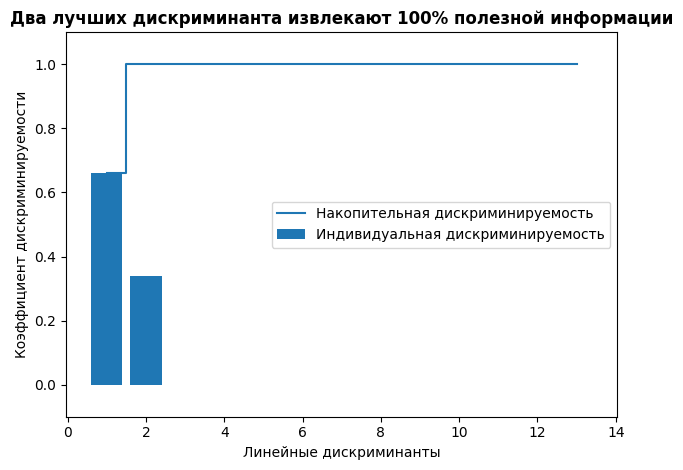

In [42]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 14), discr, align='center', label='Индивидуальная дискриминируемость')
plt.step(range(1, 14), cum_discr, where='mid', label='Накопительная дискриминируемость')
plt.ylabel('Коэффициент дискриминируемости')
plt.xlabel('Линейные дискриминанты')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.title(label='Два лучших дискриминанта извлекают 100% полезной информации', fontweight='bold')
plt.tight_layout()
plt.show()

In [45]:
# объединим два наиболее дискриминируемых столбца собственных векторов, чтобы создать матрицу преобразования
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))

# Проецирование точек данных на новое пространство



---



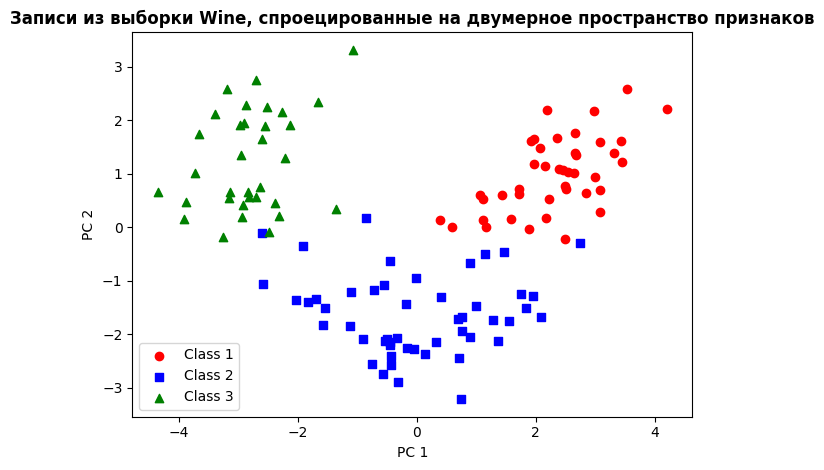

In [47]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_pca[y_train==l, 0],
              X_train_pca[y_train==l, 1],
              c=c, label=f'Class {l}', marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.title(label='Записи из выборки Wine, спроецированные на двумерное пространство признаков', fontweight='bold')
plt.tight_layout()
plt.show()

# Нелинейное уменьшение размерности и визуализация



---



In [56]:
from sklearn.datasets import load_digits
digits = load_digits()

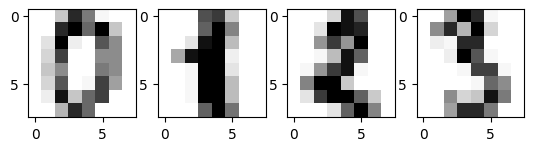

In [58]:
fig, ax = plt.subplots(1, 4)
for i in range(4):
  ax[i].imshow(digits.images[i], cmap='Greys')
plt.show()

In [60]:
from sklearn.manifold import TSNE
y_digits = digits.target
X_digits = digits.data
tsne = TSNE(n_components=2, init='pca', random_state=123)
X_dights_tsne = tsne.fit_transform(X_digits)

**На приктике нужно разобрать гиперпараметры у TSNE перплексию и скорость обучения (эпсилон).**

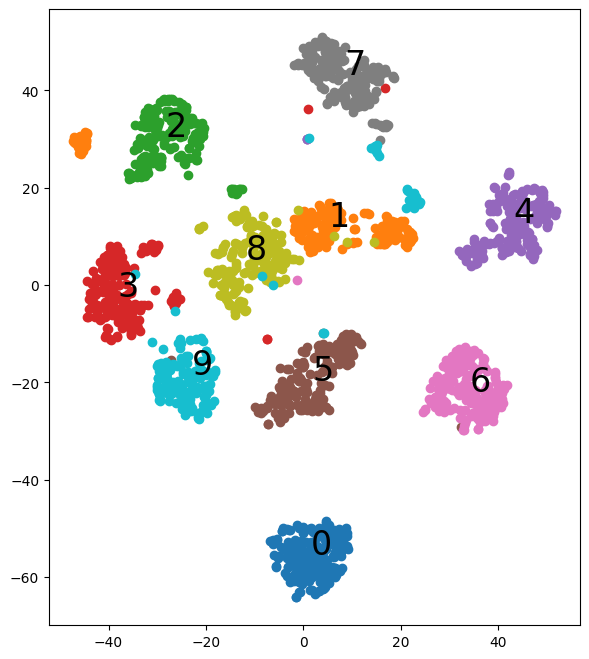

In [66]:
import matplotlib.patheffects as PathEffects
def plot_projection(x, colors):
  f = plt.figure(figsize=(8,8))
  ax = plt.subplot(aspect='equal')
  for i in range(10):
    plt.scatter(x[colors == i, 0],
                x[colors == i, 1])
  for i in range(10):
    xtext, ytext = np.median(x[colors == i, :], axis=0)
    txt = ax.text(xtext, ytext, str(i), fontsize=24)
    txt = ax.set_path_effects([
        PathEffects.Stroke(linewidth=5, foreground="w"),
        PathEffects.Normal()])

plot_projection(X_dights_tsne, y_digits)
plt.show()